In [17]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 24 09:59:55 2021

@author: chint
"""

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_curve,accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import linear_model
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [18]:
#%%

df=pd.read_csv('D:/UIUC_courses/IE517/project/MLF_GP1_CreditScore.csv')

rank=pd.read_csv('D:/UIUC_courses/IE517/project/lookup_table.csv')

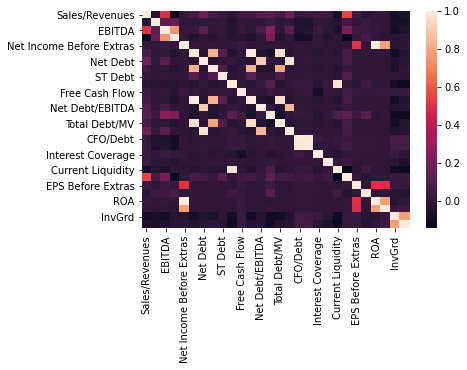

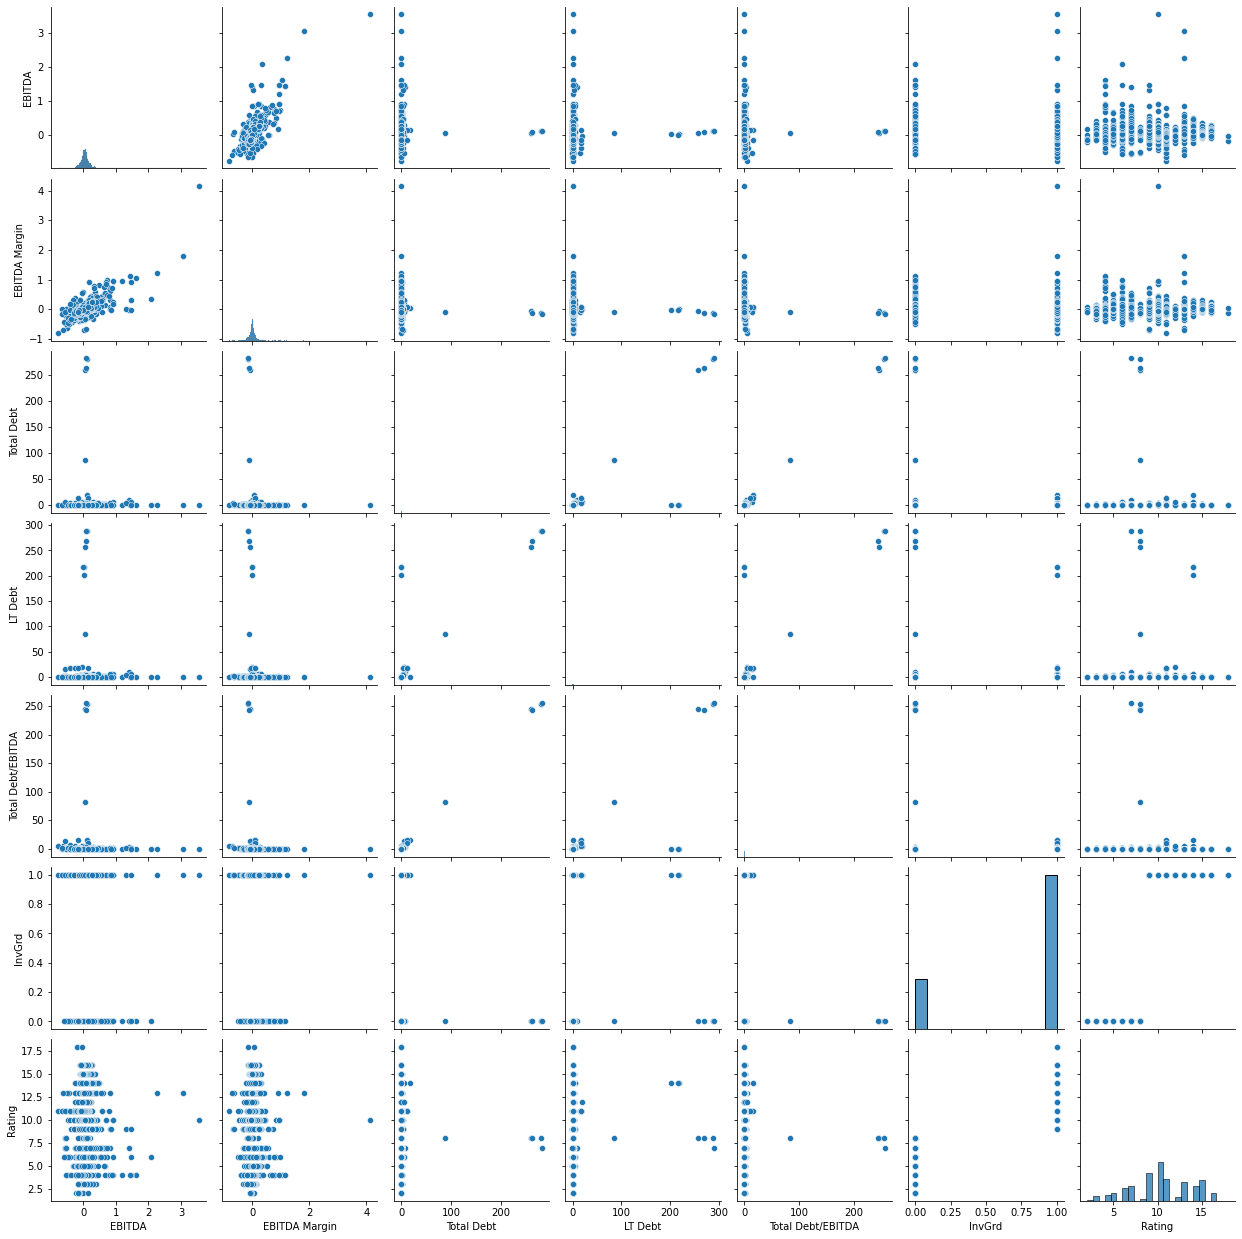

In [19]:
#%% function to convert to binary classification
def rank_convert(x):
    #np.char.lower(str(x[i]))
    temp=[]
    for i in range(len(x)):
        for j in range(len(rank['rank'])):
            if (x[i]==rank['rank'].values[j]):
                 temp.append(float(rank['rank3'].values[j]))
    return temp
#%%
temp=[]
for i in range(len(df['Rating'])):
    for j in range(len(rank['Rating'])):
        if (np.char.lower(str(df['Rating'].values[i]))==rank['Rating'].values[j]):
             temp.append(float(rank['rank'].values[j]))

df['Rating']=temp
pd_corr=df.corr()
sns.heatmap(pd_corr)
plt.show()
labels=df.keys()
corr_labels=['EBITDA','EBITDA Margin','Total Debt','LT Debt','Total Debt/EBITDA', 'InvGrd','Rating']
# sns.heatmap(df[corr_labels].corr())
# plt.show()
# print("As we see from the above correleation plots, there is strong correlation between few of the features")
sns.pairplot(df[corr_labels])

df2=df.values
X=df2[:,:-2]
y=df2[:,-1]
y=y.astype(np.float)


mean of cross validation scores= -0.000597235824748632 for alpha= 1000
mean of cross validation scores= -0.0035515044991215605 for alpha= 100
mean of cross validation scores= -0.002568565644663179 for alpha= 10
mean of cross validation scores= -0.0014690868485144337 for alpha= 1
mean of cross validation scores= 0.016912731818450266 for alpha= 0.1
mean of cross validation scores= -0.019612302123328124 for alpha= 0.01
mean of cross validation scores= -0.6535488685773869 for alpha= 0.001
mean of cross validation scores= -1.537182374292047 for alpha= 0.0001


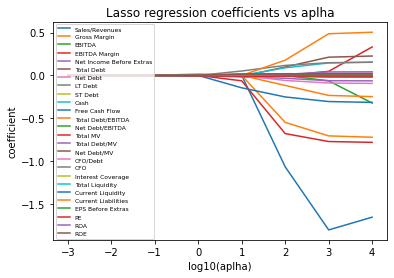

In [20]:
#%% Feature selection
score_y=[]
score_x=[]
for i in range(-3,5):

    lasso=linear_model.Lasso(alpha=10**-i)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
    pipe = Pipeline([('scaler',StandardScaler()), ('estimator', lasso)])
    #gs_cv=GridSearchCV(pipe,{},cv=3)
    #gs_cv.fit(X,y)
    print("mean of cross validation scores=",str(np.mean(cross_val_score(pipe,X,y,cv=KFold(n_splits=4, shuffle=True)))),"for alpha=",str(10**-i))
    lasso.fit(X_train,y_train)
    score_y.append(lasso.coef_)
    score_x.append(i)
   

plt.plot(np.transpose(score_x),np.array(score_y))
plt.legend(labels.values,loc='center left',fontsize=6)
plt.title("Lasso regression coefficients vs aplha")
plt.xlabel("log10(aplha)")
plt.ylabel("coefficient")
plt.show()
score_y=np.transpose(score_y)

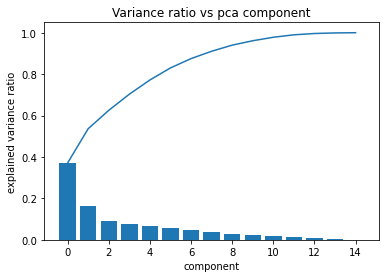

 From the graph, it is evident that 8-10 components of LDA capture 90% of variance


In [21]:
#%%  Feature extraction
lda_test=LDA()
lda_test.fit(X,y)
plt.bar(range(0,len(lda_test.explained_variance_ratio_)),lda_test.explained_variance_ratio_)
plt.plot(np.cumsum(lda_test.explained_variance_ratio_))
plt.xlabel('component')
plt.ylabel('explained variance ratio')
plt.title('Variance ratio vs pca component')
plt.show()
print(" From the graph, it is evident that 8-10 components of LDA capture 90% of variance")

In [22]:
#%% BASIC MODELS

#%% SVC


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
cv=StratifiedKFold(n_splits=10)
pipe = Pipeline([('scaler', StandardScaler()),('lda',LDA()), ('clf', SVC() )])
params={'clf__gamma':[0.001,0.1,1,10,50,100],'lda__n_components':[7,8,9,10,11,12]}
clf=GridSearchCV(pipe,params,cv=cv)
clf.fit(X_train, y_train)

print('best parameters for svc in original classification=',str(clf.best_params_))
print('best score for svc in original classification=',str(clf.best_score_))
y_predict=clf.best_estimator_.predict(X_test)
print('Out of sample accuracy with binary classification',str(accuracy_score(rank_convert(y_predict),rank_convert(y_test))))

    

best parameters for svc in original classification= {'clf__gamma': 1, 'lda__n_components': 12}
best score for svc in original classification= 0.3201680672268907
Out of sample accuracy with binary classification 0.8


In [23]:
#%% KNN

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
cv=StratifiedKFold(n_splits=10)
pipe = Pipeline([('scaler', StandardScaler()),('lda',LDA()), ('clf', KNN() )])
params={'clf__n_neighbors':[1,3,5,7,9,12],'lda__n_components':[7,8,9,10,11,12]}
clf=GridSearchCV(pipe,params,cv=cv)
clf.fit(X_train, y_train)

print('best parameters for KNN in original classification=',str(clf.best_params_))
print('best score for KNN in original classification=',str(clf.best_score_))
y_predict=clf.best_estimator_.predict(X_test)
print('Out of sample accuracy with binary classification',str(accuracy_score(rank_convert(y_predict),rank_convert(y_test))))

best parameters for KNN in original classification= {'clf__n_neighbors': 1, 'lda__n_components': 12}
best score for KNN in original classification= 0.41008403361344536
Out of sample accuracy with binary classification 0.796078431372549


In [24]:
#%% Decision Tree Classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
cv=StratifiedKFold(n_splits=10)
pipe = Pipeline([('scaler', StandardScaler()),('lda',LDA()), ('clf', tree.DecisionTreeClassifier() )])
params={'clf__max_depth':[1,3,5,7,9,12],'lda__n_components':[7,8,9,10,11,12]}
clf=GridSearchCV(pipe,params,cv=cv)
clf.fit(X_train, y_train)
print('best parameters for decision tree in original classification=',str(clf.best_params_))
print('best score for decision tree in original classification=',str(clf.best_score_))
y_predict=clf.best_estimator_.predict(X_test)
print('Out of sample accuracy with binary classification',str(accuracy_score(rank_convert(y_predict),rank_convert(y_test))))

best parameters for decision tree in original classification= {'clf__max_depth': 9, 'lda__n_components': 11}
best score for decision tree in original classification= 0.27226890756302524
Out of sample accuracy with binary classification 0.7627450980392156


In [25]:
#%% ENSEMBLING

#%% Adaboost Classifier

abc = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=12) , n_estimators=100, random_state=0)
clf2=GridSearchCV(abc,{},cv=cv)
clf2.fit(X_train, y_train)
print('best parameters for adaboost in original classification=',str(clf.best_params_))
print('best score for adaboost in original classification=',str(clf2.best_score_))
y_predict=clf2.best_estimator_.predict(X_test)
print('Out of sample accuracy with binary classification',str(accuracy_score(rank_convert(y_predict),rank_convert(y_test))))

best parameters for adaboost in original classification= {'clf__max_depth': 9, 'lda__n_components': 11}
best score for adaboost in original classification= 0.607563025210084
Out of sample accuracy with binary classification 0.8803921568627451


In [26]:
#%% Random Forest Classifier

abc = RandomForestClassifier(max_depth=12, n_estimators=100)
clf2=GridSearchCV(abc,{},cv=cv)
clf2.fit(X_train, y_train)
print('best parameters for Random Forest Classifier in original classification=',str(clf.best_params_))
print('best score for Random Forest Classifier in original classification=',str(clf2.best_score_))
y_predict=clf2.best_estimator_.predict(X_test)
print('Out of sample accuracy with binary classification',str(accuracy_score(rank_convert(y_predict),rank_convert(y_test))))

best parameters for Random Forest Classifier in original classification= {'clf__max_depth': 9, 'lda__n_components': 11}
best score for Random Forest Classifier in original classification= 0.5873949579831932
Out of sample accuracy with binary classification 0.8725490196078431


In [27]:
#%% Results


y_test=rank_convert(y_test)
y_predict=rank_convert(y_predict)
print("Since random forest seems tpo perform the best among all the models tested, the accuracies are computed based on RF model")
print('f1 score:',str(f1_score(y_predict,y_test)))
print('precision score',str(precision_score(y_predict,y_test)))
print('recall score',str(recall_score(y_predict,y_test)))
print(confusion_matrix(y_test,y_predict))

Since random forest seems tpo perform the best among all the models tested, the accuracies are computed based on RF model
f1 score: 0.9200492004920049
precision score 0.9664082687338501
recall score 0.8779342723004695
[[ 71  52]
 [ 13 374]]


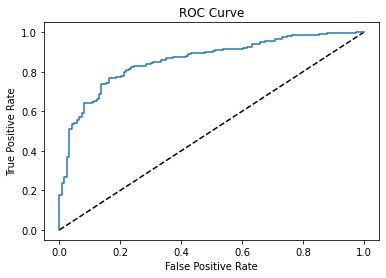

In [28]:
#%%
y_pred_prob = y_pred_prob =np.sum(clf2.predict_proba(X_test)[:,8:],axis=1)
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()